### Author: Sridharan Chandran

## NEURAL NETWORK PROJECT

**DOMAIN:** Electronics and Telecommunication

**• CONTEXT:** A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

**• DATA DESCRIPTION:** The data set contains information on various signal tests performed:

**1. Parameters:** Various measurable signal parameters.

**2. Signal_Quality:** Final signal strength or quality

**• PROJECT OBJECTIVE:** To build a classifier which can use the given parameters to determine the signal strength or quality.

## 1. Data import and Understanding

### A. Read the ‘Signals.csv’ as DataFrame and import required libraries. 
### B. Check for missing values and print percentage for each attribute. 
### C. Check for presence of duplicate records in the dataset and impute with appropriate method. 
### D. Visualise distribution of the target variable. 
### E. Share insights from the initial data analysis (at least 2).

In [84]:
#Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

In [85]:
from google.colab import files
files.upload()

Saving NN Project Data - Signal.csv to NN Project Data - Signal (1).csv


{'NN Project Data - Signal.csv': b'Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5\r\n7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5\r\n11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6\r\n7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5\r\n7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5\r\n7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5\r\n7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7\r\n7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n6.7,0.58,0.08,1.8,0.097,15,65,0.9959,3.28,0.54,9.2,5\r\n7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5\r\n5.6,0.615,0,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,5\r\n7.8,0.61,0.29,1.6,0.114,9,29,0.9974,3.26,1.56,9.1,5\r\n8.9,0.62,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,5\r\

In [86]:
# Read signal dataset
df = pd.read_csv("NN Project Data - Signal.csv")

In [87]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
df.shape #Check dimension of the dataframe.

(1599, 12)

In [89]:
# Check missing values.
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [90]:
def missing_percentage(data): #define a function for missing values percentage
    for col in data:
        print((data[col].isnull().sum()/data.shape[0])*100)

In [91]:
missing_percentage(df) # Missing values percentage 

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [92]:
#Check duplicates in the dataframe.
print("No. of duplicates present in the dataset is",df.duplicated().sum())

No. of duplicates present in the dataset is 240


In [93]:
# Drop the duplicate values 
df.drop_duplicates(inplace=True)

In [94]:
print("Shape of the dataframe after drop the duplicates", df.shape)

Shape of the dataframe after drop the duplicates (1359, 12)


In [95]:
df.Signal_Strength.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [96]:
df.Signal_Strength.value_counts(normalize=True)

5    0.424577
6    0.393672
7    0.122884
4    0.038999
8    0.012509
3    0.007358
Name: Signal_Strength, dtype: float64

In [97]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with counts at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=0, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

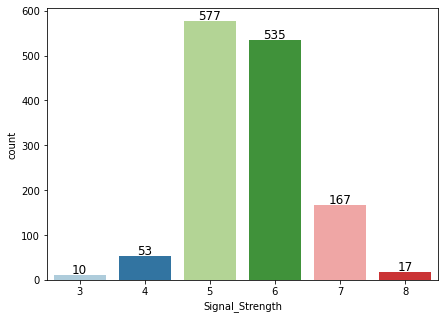

In [98]:
labeled_barplot(df,"Signal_Strength") # Distribution of target feature

In [99]:
df.info() # Check the information about the dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1359 non-null   float64
 1   Parameter 2      1359 non-null   float64
 2   Parameter 3      1359 non-null   float64
 3   Parameter 4      1359 non-null   float64
 4   Parameter 5      1359 non-null   float64
 5   Parameter 6      1359 non-null   float64
 6   Parameter 7      1359 non-null   float64
 7   Parameter 8      1359 non-null   float64
 8   Parameter 9      1359 non-null   float64
 9   Parameter 10     1359 non-null   float64
 10  Parameter 11     1359 non-null   float64
 11  Signal_Strength  1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 170.3 KB


In [100]:
df.describe().T # Check the data distribution & 5 point summery of dataframe.

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
Parameter 2,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
Parameter 3,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
Parameter 4,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
Parameter 5,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
Parameter 6,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
Parameter 7,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
Parameter 8,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
Parameter 9,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
Parameter 10,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [101]:
# Unique values of dataframe
for i in df.columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Parameter 1 are :
7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: Parameter 1, Length: 96, dtype: int64
**************************************************
Unique values in Parameter 2 are :
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: Parameter 2, Length: 143, dtype: int64
**************************************************
Unique values in Parameter 3 are :
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: Parameter 3, Length: 80, dtype: int64
**************************************************
Unique values in Parameter 4 are :
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: Parameter 4, Length: 91, dtype: int64
**

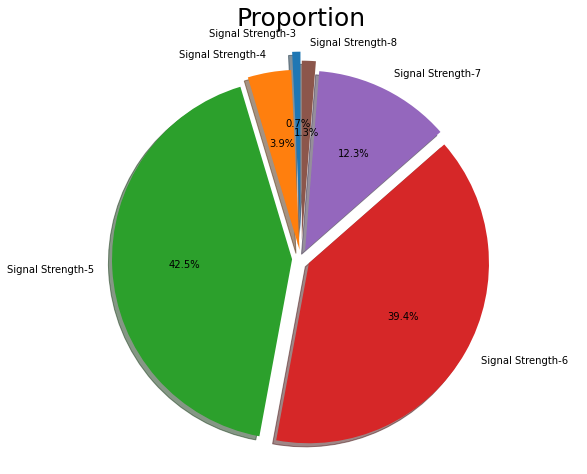

In [102]:
# Visualize the target feature with pie chart

labels = 'Signal Strength-3','Signal Strength-4', 'Signal Strength-5','Signal Strength-6','Signal Strength-7','Signal Strength-8'

sizes = [df.Signal_Strength[df['Signal_Strength']==3].count(),
         df.Signal_Strength[df['Signal_Strength']==4].count(),
         df.Signal_Strength[df['Signal_Strength']==5].count(),
         df.Signal_Strength[df['Signal_Strength']==6].count(),
         df.Signal_Strength[df['Signal_Strength']==7].count(),
         df.Signal_Strength[df['Signal_Strength']==8].count()]

explode = (0.15, 0.05,0.05,0.05,0.05,0.1)

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 25)
plt.show()

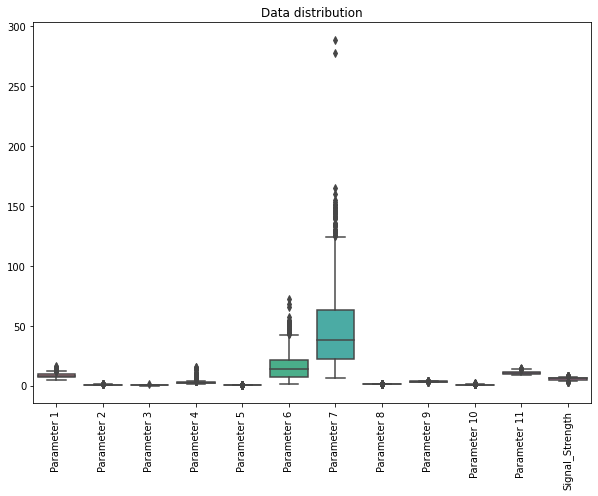

In [103]:
#Visualize the data distribution with boxplot
plt.figure(figsize=(10,7))
plt.xticks(rotation ="vertical")
plt.title("Data distribution")
sns.boxplot(data=df);

In [104]:
#Outlier Treatment
for i in df.columns:
  q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
  IQR = q3 - q1
  a = df[i] > q3 + 1.5*IQR
  b = df[i] < q1 - 1.5*IQR
  df[i] = np.where(a | b, q2, df[i])

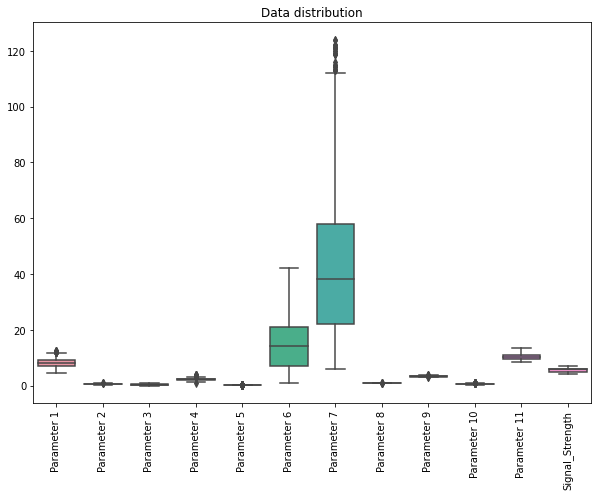

In [105]:
#Visualize the data distribution with boxplot
plt.figure(figsize=(10,7))
plt.xticks(rotation ="vertical")
plt.title("Data distribution")
sns.boxplot(data=df);

In [106]:
corr = df.corr() # Dataframe correlation

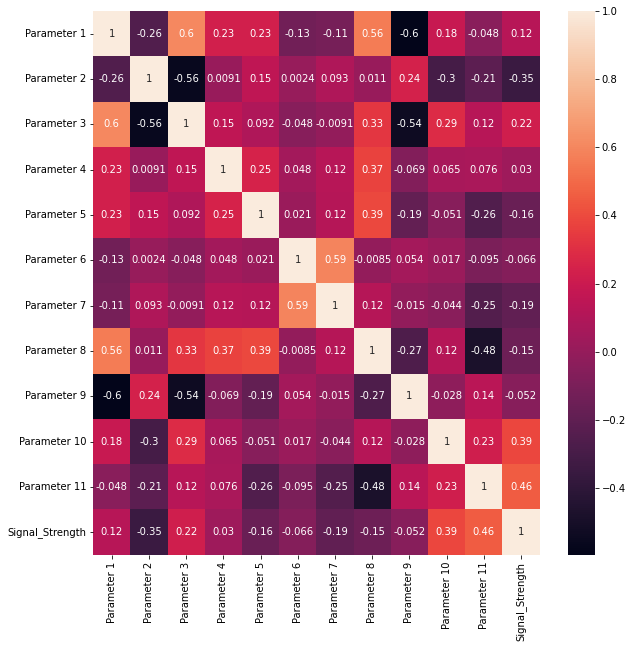

In [107]:
#Visualize the data with Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True);

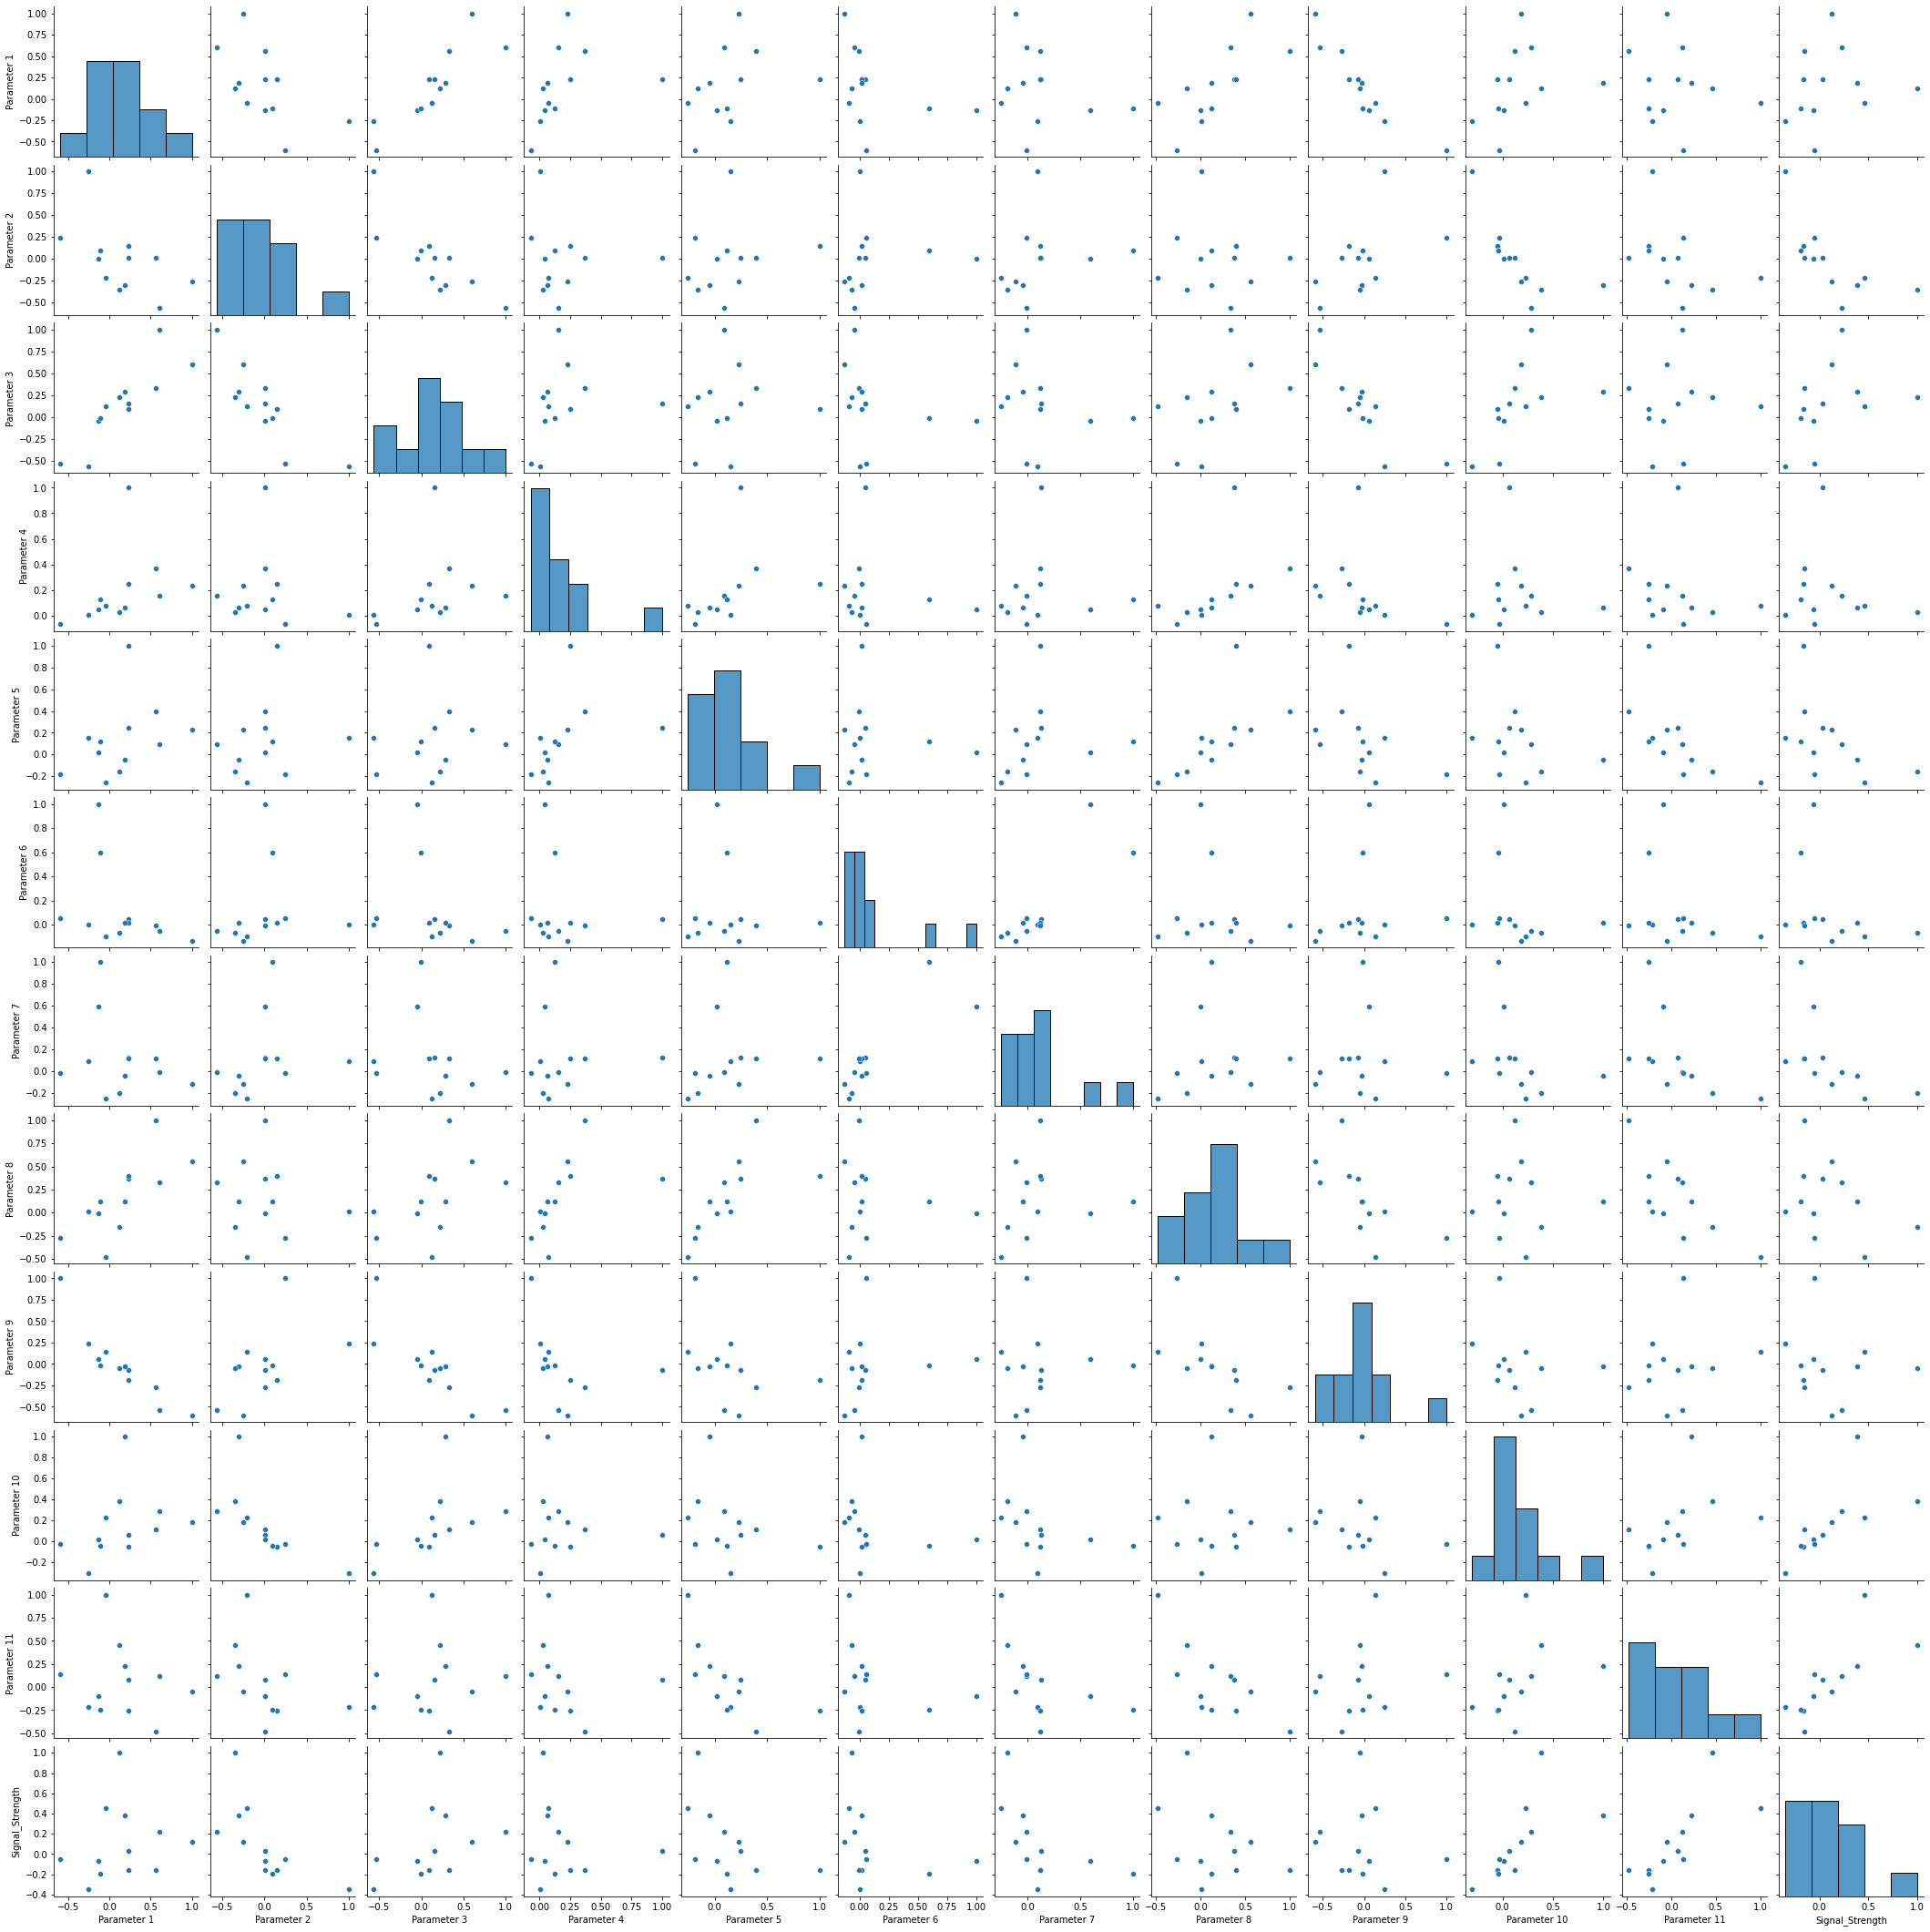

In [108]:
#Visualize the data with Pairplot
sns.pairplot(corr);

## Observations:

1. There we can see that no null values present in the dataframe.
2.  We found 240 duplicates in the dataframe & we dropped the duplicates.
3. The signal strength values are in the range 3 to 8. The signal strength 5 & 6th value counts are above 500 which are higher than other signals.
4. All the independent features are "float64" datatype & the dependent feature is "int64" datatype.
5. Most of features have outliers we can see those with boxplot. Also we can check with describe method (mean + 3*std) which Empirical rule states 99.7% data observed. We imputed the outliers to median value. 
6. We can see that there is week correlation between dependent & indepenent attributes.
7. We found that the dataset is imbalanced. We imputed the values whose are less than 2% to nearest values.

## 2. Data preprocessing

### A. Split the data into X & Y.
### B. Split the data into train & test with 70:30 proportion.
### C. Print shape of all the 4 variables and verify if train and test data is in sync.
### D. Normalise the train and test data with appropriate method. 
### E. Transform Labels into format acceptable by Neural Network.

In [109]:
# Split the data as X & Y
X = df.iloc[:,0:11] # Independent attributes
Y = df.iloc[:,11] # Dependent attributes

In [110]:
X.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [111]:
Y.head()

0    5.0
1    5.0
2    5.0
3    6.0
5    5.0
Name: Signal_Strength, dtype: float64

In [112]:
#Split the dataframe as train & test data (70:30)
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [113]:
#Print dimensions of the all train & test data.
print("X_train shape is",X_train.shape)
print("X_test shape is",X_test.shape)
print("Y_train shape is",Y_train.shape)
print("Y_test shape is",Y_test.shape)

X_train shape is (951, 11)
X_test shape is (408, 11)
Y_train shape is (951,)
Y_test shape is (408,)


In [114]:
X1_train = preprocessing.normalize(X_train)
X1_test = preprocessing.normalize(X_test)

In [115]:
X1_train

array([[0.15992517, 0.00829991, 0.01275353, ..., 0.06093351, 0.01639739,
        0.21863188],
       [0.11460481, 0.00573024, 0.00286512, ..., 0.03923969, 0.00635309,
        0.11709622],
       [0.37544283, 0.02186123, 0.02994038, ..., 0.14209798, 0.04134624,
        0.48474897],
       ...,
       [0.15503572, 0.0107157 , 0.00182395, ..., 0.07523792, 0.01481959,
        0.21887396],
       [0.3345016 , 0.01202702, 0.01165118, ..., 0.11914271, 0.02067145,
        0.39087828],
       [0.36177594, 0.0135169 , 0.01669735, ..., 0.1264228 , 0.02186558,
        0.45321382]])

In [116]:
# One-hot encode the labels
Y1_train = to_categorical(Y_train, dtype='int64')
Y1_test = to_categorical(Y_test, dtype='int64')

In [117]:
Y1_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [118]:
Y1_train.shape

(951, 8)

In [119]:
#Split the dataframe as train & validation data (70:30)
X_train1, X_val,Y_train1,Y_val = train_test_split(X1_train,Y1_train,test_size=0.2, random_state=42)

In [120]:
#Print all train & test datasets dimensions.
print("X_train1 shape is",X_train1.shape)
print("X_val shape is",X_val.shape)
print("Y_train1 shape is",Y_train1.shape)
print("Y_val shape is",Y_val.shape)

X_train1 shape is (760, 11)
X_val shape is (191, 11)
Y_train1 shape is (760, 8)
Y_val shape is (191, 8)


## 3. Model Training & Evaluation using Neural Network.

### A. Design a Neural Network to train a classifier.
### B. Train the classifier using previously designed Architecture.
### C. Plot 2 separate visuals.
#### i. Training Loss and Validation Loss
#### ii. Training Accuracy and Validation Accuracy
### D. Design new architecture/update existing architecture in attempt to improve the performance of the model.
### E. Plot visuals as in Q3.C and share insights about difference observed in both the models

In [121]:
# Clear the backend session & set random seed
backend.clear_session()
import random
random.seed(42)
tf.random.set_seed(42)

In [122]:
 # Create a model
signal_model = Sequential()

# Multiple Dense units with Relu activation
signal_model.add(Dense(8, activation='relu'))
signal_model.add(BatchNormalization())
signal_model.add(Dense(32, activation='relu'))
signal_model.add(Dropout(0.5))
signal_model.add(Dense(8,  activation='softmax'))

In [123]:
opt = optimizers.Adam(learning_rate=0.0001)

In [124]:
# Compile the model
signal_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

# Fit the model
NN_model = signal_model.fit(x=X_train1, y=Y_train1, batch_size=500, epochs=100, validation_data=(X_val, Y_val),)

Epoch 1/100
2/2 [==============================] - 1s 192ms/step - loss: 2.0797 - accuracy: 0.1237 - val_loss: 2.0994 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 2.0506 - accuracy: 0.1421 - val_loss: 2.0979 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 2.0654 - accuracy: 0.1447 - val_loss: 2.0964 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 2.0622 - accuracy: 0.1408 - val_loss: 2.0949 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 2.0692 - accuracy: 0.1421 - val_loss: 2.0935 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 31ms/step - loss: 2.0739 - accuracy: 0.1355 - val_loss: 2.0921 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 2.0604 - accuracy: 0.1526 - val_loss: 2.0906 - val_accuracy: 0.

In [125]:
# score of test data
score_t = signal_model.evaluate(X1_test, Y1_test)
print("Loss : %.2f" %(score_t[0]))
print("Accuracy : %.2f" %(score_t[1]))

13/13 [==============================] - 0s 3ms/step - loss: 1.9888 - accuracy: 0.3456
Loss : 1.99
Accuracy : 0.35


Text(0.5, 1.0, 'Training and validation loss')

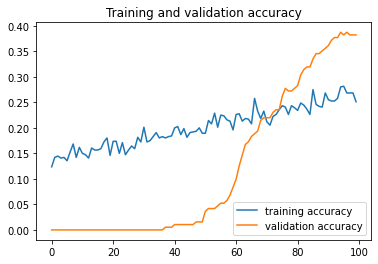

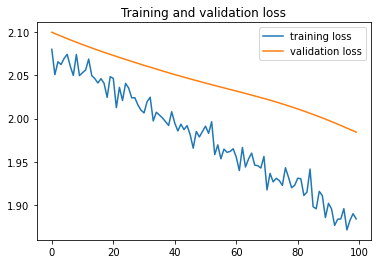

In [126]:
# Plot the training & Validation Loss & accuracy
Acc = NN_model.history['accuracy']
Val_acc  = NN_model.history['val_accuracy']
Loss     = NN_model.history['loss']
Val_loss = NN_model.history['val_loss']

epochs   = range(len(Acc)) # Get number of epochs

plt.plot  ( epochs, Acc, label = 'training accuracy' )
plt.plot  ( epochs, Val_acc, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, Loss, label = 'training loss' )
plt.plot  ( epochs, Val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

We created a model & we got only 35% of Accuracy on the test dataset.With above plot We can see that our model is underfit where our training accuracy is 25% & validation accuracy is 38% only. Hence we have to increase the model performance by doing some modification on model building. Lets try with elimination of some features like normalization, dropout & change the learing rate.

In [127]:
# Clear the backend session & set random seed
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [128]:
 # Create a model
model1 = Sequential()

# Multiple Dense units with Relu activation
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(8, activation='softmax'))

In [129]:
opt1 = optimizers.Adam(learning_rate=0.01)

In [130]:
# Compile the model
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt1)

# Fit the model
NN_model1 = model1.fit(x=X_train1, y=Y_train1, batch_size=50, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 1.3880 - accuracy: 0.4158 - val_loss: 1.1552 - val_accuracy: 0.4555
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1.1490 - accuracy: 0.4132 - val_loss: 1.1063 - val_accuracy: 0.4555
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1.1362 - accuracy: 0.4092 - val_loss: 1.1798 - val_accuracy: 0.3822
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 1.1445 - accuracy: 0.4382 - val_loss: 1.1178 - val_accuracy: 0.4555
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 1.1302 - accuracy: 0.4263 - val_loss: 1.1047 - val_accuracy: 0.4764
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 1.1282 - accuracy: 0.4355 - val_loss: 1.1001 - val_accuracy: 0.4607
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 1.1265 - accuracy: 0.4250 - val_loss: 1.1299 - val_accuracy: 0.3822
Epoch 8/100


In [131]:
# score of test data
score1 = model1.evaluate(X1_test, Y1_test)
print("Loss : %.2f" %(score1[0]))
print("Accuracy : %.2f" %(score1[1]))

13/13 [==============================] - 0s 3ms/step - loss: 0.9244 - accuracy: 0.5882
Loss : 0.92
Accuracy : 0.59


In [132]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 8)                 5

Text(0.5, 1.0, 'Training and validation loss')

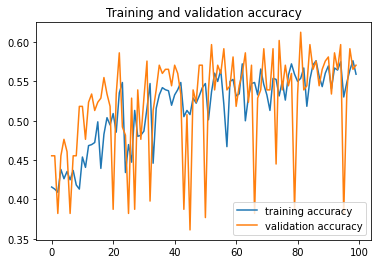

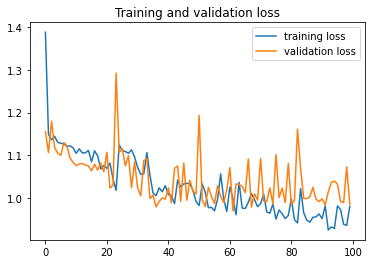

In [133]:
# Plot the training & Validation Loss & accuracy
accuracy = NN_model1.history['accuracy']
val_accuracy  = NN_model1.history['val_accuracy']
loss     = NN_model1.history['loss']
val_loss = NN_model1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [134]:
y_pred = model1.predict(X1_test)
y_pred = (y_pred > 0.5).astype(int)

13/13 [==============================] - 0s 2ms/step


In [135]:
y_pred.shape

(408, 8)

In [136]:
print ('Classification Report : ')
print (classification_report(Y1_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        13
           5       0.70      0.49      0.58       172
           6       0.53      0.46      0.50       173
           7       0.59      0.26      0.36        50

   micro avg       0.61      0.44      0.51       408
   macro avg       0.23      0.15      0.18       408
weighted avg       0.59      0.44      0.50       408
 samples avg       0.44      0.44      0.44       408



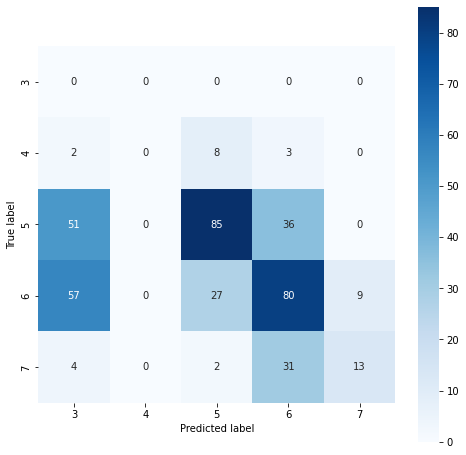

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y1_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, fmt='d',
            xticklabels=['3','4','5','6','7'], yticklabels=['3','4','5','6','7'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


## Observations:

1. Increasing of model hidden layers & nodes makes the model performance good. We got accuracy score of testing dataset from 40% to 59%.
2. Adam optimizer is perform better than SGD optimizer for multiclasss classification.
3. Reducing the batchsize & increasing epoch makes the model accuracy better.
4. We can see that train & validation set accuracy parallelly increased in the second model & learned the data better than 1st model
5. Loss fuction of the second model significantly decreased than 1st model. 
6. In both accuracy & loss function of the 2nd model, we can see that more hills & vallys in the plot which learning the data better than previous model.



# Part B
**• DOMAIN:** Autonomous Vehicles

**• CONTEXT:** A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

**• DATA DESCRIPTION:** The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.

The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/ Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF http://ufldl.stanford.edu/housenumbers as the URL for this site

**• PROJECT OBJECTIVE:** To build a digit classifier on the SVHN (Street View Housing Number) dataset

## Steps and tasks: 

## 1. Data Import and Exploration.
### A. Read the .h5 file and assign to a variable.
### B. Print all the keys from the .h5 file.
### C. Split the data into X_train, X_test, Y_train, Y_test

In [138]:
!pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import h5py
file = h5py.File('/content/drive/My Drive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [141]:
file.keys() # Print all keys of the file

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [142]:
# Split the data as training, validation, and test dataset & save into variable.
X_train = np.array(file['X_train'][:])
y_train = np.array(file['y_train'][:])
X_val = np.array(file['X_val'][:])
y_val = np.array(file['y_val'][:])
X_test = np.array(file['X_test'][:])
y_test = np.array(file['y_test'][:])

## 2. Data Visualisation and preprocessing.
### A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.
### B. Visualise first 10 images in train data and print its corresponding labels.
### C. Reshape all the images with appropriate shape update the data in same variable. 
### D. Normalise the images i.e. Normalise the pixel values.
### E. Transform Labels into format acceptable by Neural Network.
### F. Print total Number of classes in the Dataset.

In [143]:
print("X_test shape is",X_test.shape)
print("X_train shape is",X_train.shape)
print("X_val shape is",X_val.shape)
print("y_test shape is",y_test.shape)
print("y_train shape is",y_train.shape)
print("y_val shape is",y_val.shape)

X_test shape is (18000, 32, 32)
X_train shape is (42000, 32, 32)
X_val shape is (60000, 32, 32)
y_test shape is (18000,)
y_train shape is (42000,)
y_val shape is (60000,)


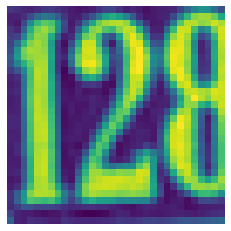

Label: 2


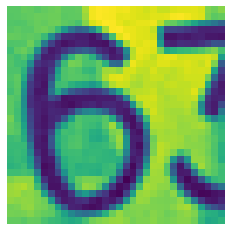

Label: 6


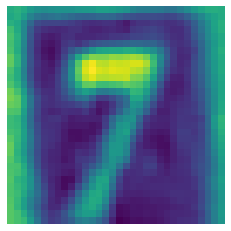

Label: 7


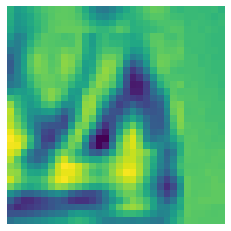

Label: 4


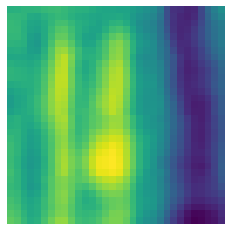

Label: 4


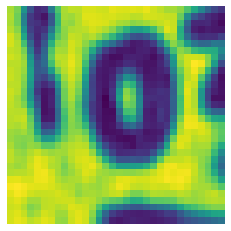

Label: 0


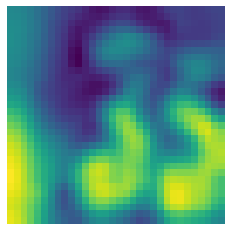

Label: 3


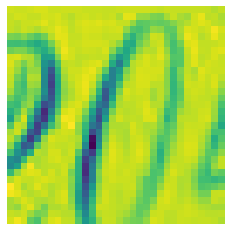

Label: 0


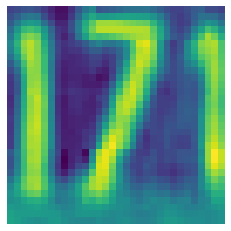

Label: 7


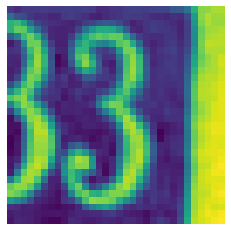

Label: 3


In [144]:
# Plot the first 10 images and their labels
for i in range(10):
    plt.imshow(X_train[i].reshape(32, 32))
    plt.axis('off')
    plt.show()
    print('Label:', y_train[i])

In [145]:
# Reshape the input data 2D (32 x 32) to 1D (1024)
X_train = np.reshape(X_train, (X_train.shape[0], 32 * 32 * 1))
X_test = np.reshape(X_test, (X_test.shape[0], 32 * 32 * 1))
X_val = np.reshape(X_val, (X_val.shape[0], 32 * 32 * 1))

print("X_train shape is",X_train.shape)
print("X_test shape is",X_test.shape)
print("X_val shape is",X_val.shape)

X_train shape is (42000, 1024)
X_test shape is (18000, 1024)
X_val shape is (60000, 1024)


In [146]:
Min = X_train.min() # Max value of train data
Max = X_train.max() # Max value of train data
print("Minimum value of train data is", Min)
print("Maximum value of train data is", Max)

Minimum value of train data is 0.0
Maximum value of train data is 254.9745


In [147]:
# Normalize the data # Convert the values between 0 to 1.
X_train = X_train / Max
X_val = X_val / Max
X_test = X_test / Max

In [148]:
X_train.max() # Check max value of train data

1.0

In [149]:
# Transform the labels into a format acceptable by a neural network

print(" Sample label value", y_train[1])

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


print("\n Sample label value after encoding",y_train[1])

 Sample label value 6

 Sample label value after encoding [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [150]:
# Number of classes in the Dataset
print('No. of classes in the dataframe is', y_train.shape[1])

No. of classes in the dataframe is 10


## 3. Model Training & Evaluation using Neural Network.
### A. Design a Neural Network to train a classifier.
### B. Train the classifier using previously designed Architecture (Use best suitable parameters).
### C. Evaluate performance of the model with appropriate metrics.
### D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

In [151]:
# Clear the backend session & set random seed
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [152]:
def create_model(lr, dropout_rate,epochs, batch_size):
  #Create a Neural Network model
  model = Sequential()

  # Add hidden & Output layers
  model.add(Dense(64, input_shape=(1024,), activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(512,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # adam optmizer with custom learning rate
  opt= optimizers.Adam(lr)

  #Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  #Fit the model
  Digit = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=epochs, batch_size=batch_size)
    

In [153]:
#1st Model
lr = 0.01
dropout_rate = 0.3
epochs = 50
batch_size =100
create_model(lr, dropout_rate,epochs, batch_size)

Epoch 1/50
420/420 [==============================] - 5s 9ms/step - loss: 2.3739 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/50
420/420 [==============================] - 5s 11ms/step - loss: 2.3035 - accuracy: 0.1009 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/50
420/420 [==============================] - 6s 14ms/step - loss: 2.3036 - accuracy: 0.1003 - val_loss: 2.3036 - val_accuracy: 0.1018
Epoch 4/50
420/420 [==============================] - 5s 11ms/step - loss: 2.3036 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/50
420/420 [==============================] - 6s 13ms/step - loss: 2.3036 - accuracy: 0.0997 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/50
420/420 [==============================] - 6s 14ms/step - loss: 2.3033 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/50
420/420 [==============================] - 4s 9ms/step - loss: 2.3034 - accuracy: 0.0985 - val_loss: 2.3033 - val_accuracy: 0.1000
E

We created NN Model1 & we got train set accuracy 0.099 & validation set accuracy 0.1 which model is perform very poorly. Hence we need to create another model with different parameters to achieve better accuracy score.

In [154]:
# Clear the backend session & set random seed
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [155]:
#2nd Model
lr = 0.001
dropout_rate = 0
epochs = 100
batch_size =500
Model2 = create_model(lr, dropout_rate,epochs, batch_size)

Epoch 1/100
84/84 [==============================] - 2s 20ms/step - loss: 1.5557 - accuracy: 0.4700 - val_loss: 2.1698 - val_accuracy: 0.3610
Epoch 2/100
84/84 [==============================] - 1s 11ms/step - loss: 0.9309 - accuracy: 0.7043 - val_loss: 1.8804 - val_accuracy: 0.5513
Epoch 3/100
84/84 [==============================] - 1s 11ms/step - loss: 0.7689 - accuracy: 0.7539 - val_loss: 1.3642 - val_accuracy: 0.6413
Epoch 4/100
84/84 [==============================] - 1s 9ms/step - loss: 0.6649 - accuracy: 0.7902 - val_loss: 1.1039 - val_accuracy: 0.6515
Epoch 5/100
84/84 [==============================] - 1s 8ms/step - loss: 0.6062 - accuracy: 0.8089 - val_loss: 0.9252 - val_accuracy: 0.6999
Epoch 6/100
84/84 [==============================] - 1s 8ms/step - loss: 0.5672 - accuracy: 0.8197 - val_loss: 1.0614 - val_accuracy: 0.6505
Epoch 7/100
84/84 [==============================] - 1s 8ms/step - loss: 0.5102 - accuracy: 0.8383 - val_loss: 1.0023 - val_accuracy: 0.6775
Epoch 8/10

* The above 2nd model train accuracy is 0.99 which is good accuracy score, However the validation accuracy score is 0.85 only. Which is overfit model. Hence we need to tune the model to prevent overfitting.

In [156]:
# Clear the backend session & set random seed
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [157]:
#Create a Final Neural Network model
NN_model = Sequential()

# Add hidden & Output layers
NN_model.add(Dense(64, input_shape=(1024,), activation='relu'))
NN_model.add(Dense(128,activation='relu'))
NN_model.add(Dense(128,activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dropout(0.5))
NN_model.add(Dense(512,activation='relu'))
NN_model.add(BatchNormalization())
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(10, activation='softmax'))

# adam optmizer with custom learning rate
opt= optimizers.Adam(0.001)

#Compile the model
NN_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Fit the model
History = NN_model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=100, batch_size=500)
  

Epoch 1/100
84/84 [==============================] - 2s 16ms/step - loss: 2.0255 - accuracy: 0.2835 - val_loss: 2.1121 - val_accuracy: 0.3262
Epoch 2/100
84/84 [==============================] - 1s 9ms/step - loss: 1.2552 - accuracy: 0.5940 - val_loss: 1.7331 - val_accuracy: 0.5153
Epoch 3/100
84/84 [==============================] - 1s 9ms/step - loss: 1.0636 - accuracy: 0.6649 - val_loss: 1.3987 - val_accuracy: 0.5558
Epoch 4/100
84/84 [==============================] - 1s 9ms/step - loss: 0.9758 - accuracy: 0.6940 - val_loss: 1.0990 - val_accuracy: 0.6416
Epoch 5/100
84/84 [==============================] - 1s 8ms/step - loss: 0.9085 - accuracy: 0.7129 - val_loss: 0.9300 - val_accuracy: 0.7014
Epoch 6/100
84/84 [==============================] - 1s 9ms/step - loss: 0.8708 - accuracy: 0.7271 - val_loss: 1.0269 - val_accuracy: 0.6587
Epoch 7/100
84/84 [==============================] - 1s 13ms/step - loss: 0.8325 - accuracy: 0.7391 - val_loss: 0.9153 - val_accuracy: 0.7004
Epoch 8/100

In [158]:
y_pred_1 = NN_model.predict(X_test)

563/563 [==============================] - 1s 2ms/step


In [159]:
# score of test data
Score = NN_model.evaluate(X_test, y_test)
print("Loss : %.2f" %(Score[0]))
print("Accuracy : %.2f" %(Score[1]))

563/563 [==============================] - 2s 3ms/step - loss: 0.7558 - accuracy: 0.8011
Loss : 0.76
Accuracy : 0.80


In [160]:
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [161]:
y_pred_final_1=[]
for i in y_pred_1:
  y_pred_final_1.append(np.argmax(i))

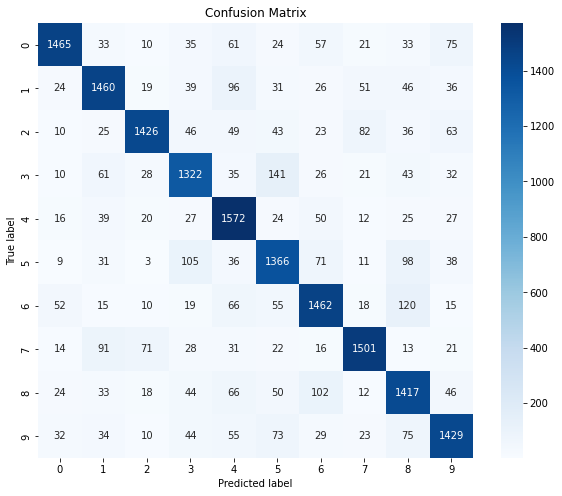

In [162]:
# Generate predictions for the test set
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_true_1 = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_1, y_pred_classes_1)


# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, fmt='d',
            xticklabels=['0','1','2','3','4','5','6','7','8','9'], yticklabels=['0','1','2','3','4','5','6','7','8','9'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [163]:
print("Classification Report")
print(classification_report(y_true_1, y_pred_classes_1))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1814
           1       0.80      0.80      0.80      1828
           2       0.88      0.79      0.83      1803
           3       0.77      0.77      0.77      1719
           4       0.76      0.87      0.81      1812
           5       0.75      0.77      0.76      1768
           6       0.79      0.80      0.79      1832
           7       0.86      0.83      0.84      1808
           8       0.74      0.78      0.76      1812
           9       0.80      0.79      0.80      1804

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000



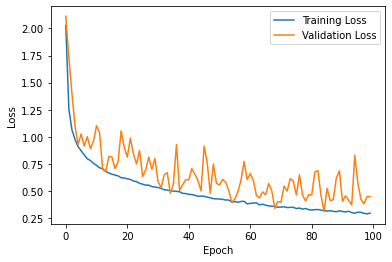

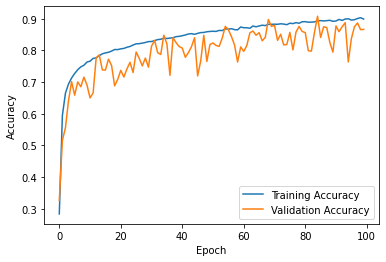

In [164]:
# Plot the training and validation loss vs. number of epochs
plt.plot(History.history['loss'], label='Training Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy vs. number of epochs
plt.plot(History.history['accuracy'], label='Training Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Observations:
1. We created 1st model with parameters (lr = 0.01, dropout = 0.3, epochs = 50, batch_size =100) & we got 10% accuracy which is underfit model.

2. Then we created 2nd model with parameters (lr = 0.001, dropout = 0, epochs = 100, batch_size =500). We got 98% accuracy on training set & 75% on val set which is overfit model.

3. Then we created final model with parameters (lr = 0.001, dropout = 0.5, epochs = 100, batch_size =500). We got 81% accuracy on test dataset.

4. With above data we can assume the followings,

  * Reducing the learning rate will improve the model accuracy. Where we also keep in mind that reducing "lr" very low that leads to dificultcy in finding global minima.

  * Dropout will help to prevent overfitting the model.

  * Increasing epochs will improve the accuracy of the model.

5. With the above plots, We can see the accuracy & loss of the model. Initially accuracy starts from 30% and with the 100 no. of epoch maximum got 80% accuracy. When model accuracy increases, loss function of the model decreased. We can see that there is a lot of noise in the model & more fluctuations in the validation set. where steady rise in the train set accuracy.